In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
X =  pd.read_csv('Linear_X_Train.csv')
Y =  pd.read_csv('Linear_Y_Train.csv')

X= X.values
Y = Y.values

#Normalisation
u = X.mean()
std = X.std()
X= (X-u)/std

print(X.shape,Y.shape)
print(u,std)

(3750, 1) (3750, 1)
-0.03779466168006855 0.9920801322508517


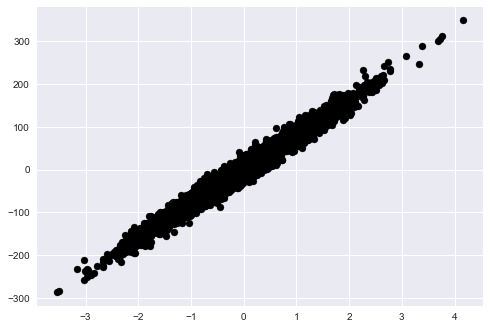

In [3]:
plt.style.use('seaborn')
plt.scatter(X,Y,color = 'Black')
plt.show()

In [ ]:
#Linear Regression

In [39]:
def hypothesis(x,theta):
    y_ = theta[0] + theta[1]*x
    return y_

def grad(X,Y,theta):
    
    grad = np.zeros((2,))
    m = X.shape[0]
    #calculating gradient
    for i in range(m):
        x= X[i]
        y_ = hypothesis(x,theta)
        grad[0] += (y_ - Y[i])
        grad[1] += (y_-Y[i])*x
        
    return grad/m   

#to find the error jtheta
def error(X,Y,theta):
    m = X.shape[0]
    total_error = 0.0
    for i in range(m):
        y_= hypothesis(X[i],theta)
        total_error += (y_-Y[i])**2
        
    return total_error/m    

def gradient_descent(X,Y,learning_rate=0.5,max_steps = 100):
    m = X.shape[0]
    theta = np.zeros((2,))
    error_list = []
    theta_list = []
    
    #updating theta
    for i in range(max_steps):
        grad1 = grad(X,Y,theta)
        e = error(X,Y,theta)
        error_list.append(e)
        
        theta[0] = theta[0] - learning_rate*grad1[0]
        theta[1] = theta[1] - learning_rate*grad1[1]
        theta_list.append((theta[0],theta[1]))
        
    return theta,error_list,theta_list





    
    
   
    
    
    
    

In [40]:
theta,error_list,theta_list = gradient_descent(X,Y)
print(theta)


[ 0.68386897 79.90573694]


In [32]:
X.shape[0]



3750

In [30]:
y_ =  hypothesis(X,theta)
print(y_)

[[-19.57388181]
 [-43.69687794]
 [ 86.48717332]
 ...
 [-20.85100092]
 [138.7056574 ]
 [-35.87992564]]


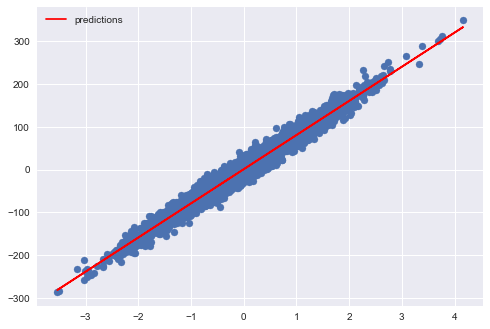

In [8]:
plt.scatter(X,Y)
plt.plot(X,y_,color='red',label = 'predictions')
plt.legend()
plt.show()

In [9]:
X_test = pd.read_csv('Linear_X_Test.csv').values

Y_pred = hypothesis(X_test,theta)


In [42]:
print(Y_pred)

[[-147.52439132]
 [ -66.26570453]
 [-200.05620583]
 ...
 [  14.03673979]
 [ -18.66650943]
 [ -51.07517461]]


In [43]:
df = pd.DataFrame(data = Y_pred , columns=["y"])


In [44]:
df.to_csv('predictions.csv',index=False)

In [10]:
def r2_score(Y,y_):
    num = np.sum((Y-y_)**2)
    
    denum = np.sum((Y-Y.mean())**2)
    
    score = 1 - (num/denum)
    return score*100




In [11]:
r2_score(Y,y_)

97.09612233822354

In [12]:
import numpy as np
import matplotlib.pyplot as plt


In [13]:
theta

array([ 0.68386897, 79.90573694])

In [16]:
#generating the surface plot for loss function which jtheta

T0 = np.arange(-40,40,1)
T1 = np.arange(40,120,1)

T0 ,T1 = np.meshgrid(T0,T1)


T0.shape

(80, 80)

In [18]:
J = np.zeros(T0.shape)
J.shape

(80, 80)

In [45]:
for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        y_ = T1[i,j]*X + T0[i,j]
        J[i,j] = np.sum((Y-y_)**2)/Y.shape[0]
      


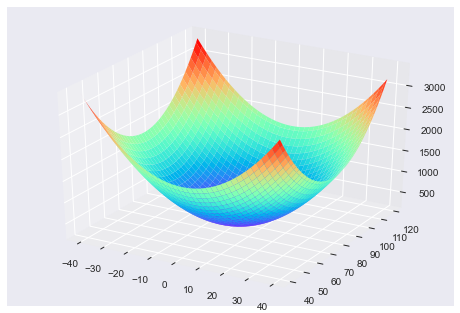

In [46]:
fig= plt.figure()
axes = fig.gca(projection='3d')
axes.plot_surface(T0,T1,J,cmap='rainbow')
plt.show()

C:\Users\nsnik\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


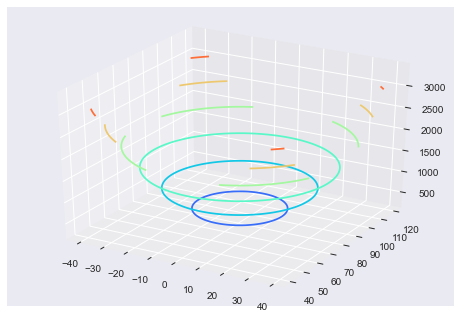

In [47]:
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.contour(T0,T1,J,cmap='rainbow')
plt.show()

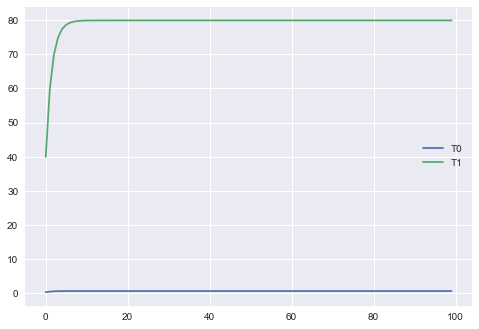

In [48]:
# generating the surface plot for the theta updates

T =  np.array(theta_list)

plt.plot(T[:,0],label = 'T0')
plt.plot(T[:,1],label = 'T1')
plt.legend()
plt.show()
           


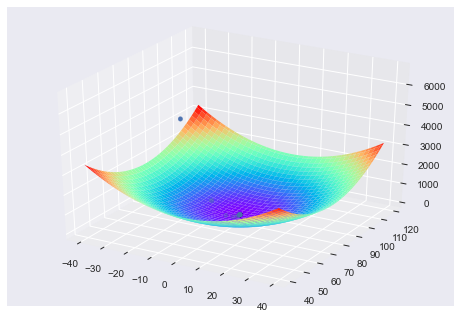

In [49]:
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.plot_surface(T0,T1,J,cmap='rainbow')
axes.scatter(T[:,0],T[:,1],error_list)
plt.show()


C:\Users\nsnik\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


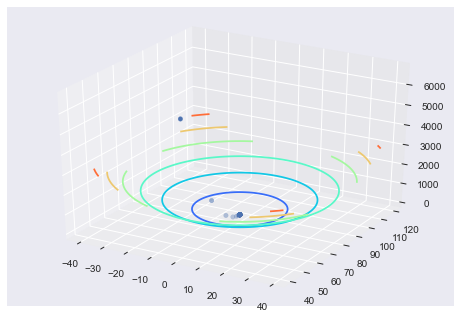

In [50]:
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.contour(T0,T1,J,cmap='rainbow')
axes.scatter(T[:,0],T[:,1],error_list)
plt.show()


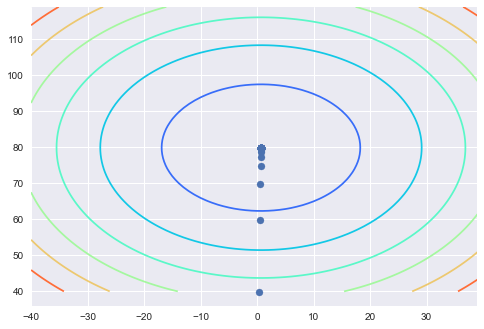

In [53]:
#in 2d 

plt.contour(T0,T1,J,cmap='rainbow')
plt.scatter(T[:,0],T[:,1])
plt.show()

In [55]:
theta_list
np.save('ThetaList.npy',theta_list)
